In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:

from google.colab import files
files.upload()

In [ ]:
##Recuperation des donnees

data = pd.read_excel('Copie de PG_StMary_Epworth_RRDI_frag_HRV_PROOF-05juil2022-P2.xlsx', index_col=0, dtype={'date_evt_CV': str})  

pd.set_option('display.max_column', 58)
data.head()

,P2_Polysomno_Date,P2_StMary_HeurePrepa,P2_StMary_HeureEndormi,P2_StMary_HeureReveil,P2_StMary_HeureLever,P2_StMary_ProfondeurSommeil,P2_StMary_NbReveils,P2_StMary_DureeSommeilNuit,P2_StMary_DureeSommeilJour,P2_StMary_QualiteSommeil,P2_StMary_NbPlaintes,P2_StMary_CommentSentiLever,P2_StMary_SatisfaitSommeil,P2_StMary_EveilPrecoce,P2_StMary_DifficulteEndormiss,P2_StMary_LatenceEndormiss,P2_Epworth,P2_Polysomno_ODI,P2_Polysomno_PTA,P2_Polysomno_SaO2moy,P2_Polysomno_IndexMEATotal,P2_tot_tps_A,P2_tot_tps_AHlim,P2_Polysomno_TempsApneesOb,P2_Polysomno_TempsHypopneesOb,P2_Polysomno_TempsLimDebOb,P2_Polysomno_TempsApneesCent,P2_Polysomno_TempsHypopneesCent,P2_Polysomno_TempsApneesMixtes,P2_oAHI,P2_cAHI,P2_AHI_surest,P2_AHI_desat,P2_AHI,RRDI,Fragmentation_PIP,Mean HR (TDNight),HF (FTNight),LF/HF (FTNight),%VLFIpsd (IncNight),FDR_CV,HTA,DL,DNID,Tabac actif,ATCD fam,date_deces,date_AVC,date_Evt_cardiovasculaire,sexe,date_cancer,date_DTA
IDNumSujet,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,2003-05-02,21.00,21.25,4.0,6.50,6.0,4.0,4.00,1.0,4.0,0.0,5.0,4.0,1.0,1.0,0.25,6.0,44.6,487.0,95.0,61.109,03:55:52,04:43:15,03:21:15,00:34:37,00:44:38,00:02:33,00:00:12,00:00:00,56.180700,0.862423,57.043120,11.581110,48.049283,35.5022,66.8138,65.9306,230.4006,3.0698,3.4051,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-02,NaN,2019-01-02 00:00:00,M,NaT,0.0
2.0,2003-02-21,22.50,24.00,8.0,8.00,2.0,4.0,7.00,0.0,4.0,3.0,3.0,2.0,0.0,2.0,1.50,1.0,2.2,559.0,96.0,41.431,01:06:41,04:18:23,00:03:01,01:03:40,03:10:49,00:00:10,00:00:43,00:00:00,14.382830,0.429338,14.812160,0.429338,1.610018,25.2300,76.3965,64.8204,59.428,9.3322,2.5469,0.0,0.0,0.0,0.0,0.0,0.0,2010-02-17,NaN,2010-02-17 00:00:00,F,2008-01-01,0.0
3.0,2003-03-24,23.50,23.50,7.0,7.25,4.0,2.0,7.25,0.0,4.0,1.0,4.0,4.0,0.0,2.0,1.00,4.0,6.8,440.0,95.0,39.545,01:09:51,02:30:14,00:09:19,01:00:32,01:03:12,00:02:48,00:14:23,00:00:00,25.636360,6.681818,32.318180,3.954545,7.909091,59.0511,66.7339,54.1617,438.7107,5.038,1.495,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,0.0,F,NaT,0.0
5.0,2003-03-25,0.17,23.00,7.0,7.17,4.0,1.0,9.00,0.0,4.0,1.0,4.0,2.0,0.0,1.0,0.17,1.0,0.5,454.0,95.0,74.273,00:23:48,01:32:22,00:05:42,00:18:06,00:59:34,00:02:36,00:06:24,00:00:00,8.061674,3.303965,11.365640,0.132159,2.907489,15.1060,78.8855,66.8844,175.1532,4.3359,1.9342,0.0,0.0,0.0,0.0,0.0,0.0,2004-03-12,NaN,2004-02-01 00:00:00,M,NaT,0.0
6.0,2003-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.5,565.0,97.0,35.044,00:17:51,01:02:31,00:00:23,00:17:28,00:41:43,00:00:58,00:01:59,00:00:00,5.309735,1.061947,6.371682,0.106195,0.849557,15.0328,70.8726,64.7089,105.3986,3.1224,3.4082,2.0,1.0,1.0,0.0,0.0,0.0,NaT,NaN,0.0,F,NaT,0.0


In [ ]:
##Agrandissement de l'affichage

pd.set_option('display.max_row', 40)
pd.set_option('display.max_column', 40)

In [ ]:
data.head()

,P2_Polysomno_Date,P2_StMary_HeurePrepa,P2_StMary_HeureEndormi,P2_StMary_HeureReveil,P2_StMary_HeureLever,P2_StMary_ProfondeurSommeil,P2_StMary_NbReveils,P2_StMary_DureeSommeilNuit,P2_StMary_DureeSommeilJour,P2_StMary_QualiteSommeil,P2_StMary_NbPlaintes,P2_StMary_CommentSentiLever,P2_StMary_SatisfaitSommeil,P2_StMary_EveilPrecoce,P2_StMary_DifficulteEndormiss,P2_StMary_LatenceEndormiss,P2_Epworth,P2_Polysomno_ODI,P2_Polysomno_PTA,P2_Polysomno_SaO2moy,...,P2_AHI_desat,P2_AHI,RRDI,Fragmentation_PIP,Mean HR (TDNight),HF (FTNight),LF/HF (FTNight),%VLFIpsd (IncNight),FDR_CV,HTA,DL,DNID,Tabac actif,ATCD fam,date_deces,date_AVC,date_Evt_cardiovasculaire,sexe,date_cancer,date_DTA
IDNumSujet,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,2003-05-02,21.00,21.25,4.0,6.50,6.0,4.0,4.00,1.0,4.0,0.0,5.0,4.0,1.0,1.0,0.25,6.0,44.6,487.0,95.0,...,11.581110,48.049283,35.5022,66.8138,65.9306,230.4006,3.0698,3.4051,0.0,0.0,0.0,0.0,0.0,0.0,2019-01-02,NaN,2019-01-02 00:00:00,M,NaT,0.0
2.0,2003-02-21,22.50,24.00,8.0,8.00,2.0,4.0,7.00,0.0,4.0,3.0,3.0,2.0,0.0,2.0,1.50,1.0,2.2,559.0,96.0,...,0.429338,1.610018,25.2300,76.3965,64.8204,59.428,9.3322,2.5469,0.0,0.0,0.0,0.0,0.0,0.0,2010-02-17,NaN,2010-02-17 00:00:00,F,2008-01-01,0.0
3.0,2003-03-24,23.50,23.50,7.0,7.25,4.0,2.0,7.25,0.0,4.0,1.0,4.0,4.0,0.0,2.0,1.00,4.0,6.8,440.0,95.0,...,3.954545,7.909091,59.0511,66.7339,54.1617,438.7107,5.038,1.495,0.0,0.0,0.0,0.0,0.0,0.0,NaT,NaN,0.0,F,NaT,0.0
5.0,2003-03-25,0.17,23.00,7.0,7.17,4.0,1.0,9.00,0.0,4.0,1.0,4.0,2.0,0.0,1.0,0.17,1.0,0.5,454.0,95.0,...,0.132159,2.907489,15.1060,78.8855,66.8844,175.1532,4.3359,1.9342,0.0,0.0,0.0,0.0,0.0,0.0,2004-03-12,NaN,2004-02-01 00:00:00,M,NaT,0.0
6.0,2003-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.5,565.0,97.0,...,0.106195,0.849557,15.0328,70.8726,64.7089,105.3986,3.1224,3.4082,2.0,1.0,1.0,0.0,0.0,0.0,NaT,NaN,0.0,F,NaT,0.0


# Analyse de la forme des données

In [ ]:
# In[3]:

df = data.copy()
df.shape


(832, 52)

In [ ]:
# In[4]:

df.dtypes.value_counts()

float64           34
object            15
datetime64[ns]     3
dtype: int64

In [ ]:
polysomno_num = ['P2_Polysomno_ODI','P2_Polysomno_PTA','P2_Polysomno_SaO2moy','P2_Polysomno_IndexMEATotal','P2_oAHI','P2_cAHI','P2_AHI','P2_AHI_desat']
question_cat = ['P2_StMary_ProfondeurSommeil','P2_StMary_NbReveils','P2_StMary_DureeSommeilNuit','P2_StMary_QualiteSommeil','P2_StMary_EveilPrecoce','P2_StMary_DifficulteEndormiss','P2_StMary_LatenceEndormiss','P2_Epworth']
FDR_cat = ['HTA','DL','DNID','Tabac actif','ATCD fam']
infosup_cat = ['sexe','RRDI','Fragmentation_PIP','Mean HR (TDNight)','HF (FTNight)','LF/HF (FTNight)','%VLFIpsd (IncNight)']
cible = ['date_AVC']





In [ ]:
df['a eu AVC'] = df[cible].sum(axis=1) != 0
df['a eu AVC']

IDNumSujet
1.0       False
2.0       False
3.0       False
5.0       False
6.0       False
          ...  
1005.0    False
1007.0    False
1009.0    False
1010.0    False
1011.0    False
Name: a eu AVC, Length: 832, dtype: bool

In [ ]:
#numerical_features = polysomno_num #+ question_num
categorical_features =  question_cat + polysomno_num + FDR_cat + infosup_cat #+ question_cat
df[categorical_features].astype(object)


,P2_StMary_ProfondeurSommeil,P2_StMary_NbReveils,P2_StMary_DureeSommeilNuit,P2_StMary_QualiteSommeil,P2_StMary_EveilPrecoce,P2_StMary_DifficulteEndormiss,P2_StMary_LatenceEndormiss,P2_Epworth,P2_Polysomno_ODI,P2_Polysomno_PTA,P2_Polysomno_SaO2moy,P2_Polysomno_IndexMEATotal,P2_oAHI,P2_cAHI,P2_AHI,P2_AHI_desat,HTA,DL,DNID,Tabac actif,ATCD fam,sexe,RRDI,Fragmentation_PIP,Mean HR (TDNight),HF (FTNight),LF/HF (FTNight),%VLFIpsd (IncNight)
IDNumSujet,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1.0,6.0,4.0,4.0,4.0,1.0,1.0,0.25,6.0,44.6,487.0,95.0,61.109,56.1807,0.862423,48.049283,11.58111,0.0,0.0,0.0,0.0,0.0,M,35.5022,66.8138,65.9306,230.4006,3.0698,3.4051
2.0,2.0,4.0,7.0,4.0,0.0,2.0,1.5,1.0,2.2,559.0,96.0,41.431,14.38283,0.429338,1.610018,0.429338,0.0,0.0,0.0,0.0,0.0,F,25.23,76.3965,64.8204,59.428,9.3322,2.5469
3.0,4.0,2.0,7.25,4.0,0.0,2.0,1.0,4.0,6.8,440.0,95.0,39.545,25.63636,6.681818,7.909091,3.954545,0.0,0.0,0.0,0.0,0.0,F,59.0511,66.7339,54.1617,438.7107,5.038,1.495
5.0,4.0,1.0,9.0,4.0,0.0,1.0,0.17,1.0,0.5,454.0,95.0,74.273,8.061674,3.303965,2.907489,0.132159,0.0,0.0,0.0,0.0,0.0,M,15.106,78.8855,66.8844,175.1532,4.3359,1.9342
6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.5,565.0,97.0,35.044,5.309735,1.061947,0.849557,0.106195,1.0,1.0,0.0,0.0,0.0,F,15.0328,70.8726,64.7089,105.3986,3.1224,3.4082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005.0,4.0,4.0,NaN,3.0,NaN,2.0,NaN,8.0,6.2,514.0,95.0,34.669,9.571985,0.233463,3.385214,2.217899,0.0,0.0,0.0,0.0,0.0,F,11.5556,68.3992,52.4401,283.6185,2.2768,2.5839
1007.0,6.0,1.0,8.5,5.0,0.0,2.0,0.5,5.0,12.6,351.0,97.0,49.402,22.73504,1.196581,10.940171,3.418804,1.0,0.0,0.0,0.0,0.0,F,57.4199,63.3459,62.9796,1216.2387,1.5031,1.0374
1009.0,4.0,2.0,5.0,3.0,0.0,3.0,1.5,9.0,15.3,465.0,94.0,123.742,18.70968,5.032258,11.612902,5.419354,1.0,0.0,0.0,0.0,0.0,F,3.0012,77.8113,64.5469,48.618,2.9614,1.9848


In [ ]:
y = ['a eu AVC']
df[y] = df[y].astype(int)

df[y]

,a eu AVC
IDNumSujet,
1.0,0
2.0,0
3.0,0
5.0,0
6.0,0
...,...
1005.0,0
1007.0,0
1009.0,0


In [ ]:
# 29 paramètres
df = df[  y + categorical_features ]
df.shape

(832, 29)

In [ ]:
#on retire les lignes comportant des erreurs ou des absences de données (On passe de 832 à 711)
df = df.dropna(axis=0)
df.shape

(711, 29)

In [ ]:
from sklearn.model_selection import train_test_split
trainset, testset = train_test_split(df, test_size=0.33, random_state=0, stratify= df['a eu AVC'])

In [ ]:
# In[14]:
trainset.shape


(476, 29)

In [ ]:
# In[15]:
testset.shape

(235, 29)

In [ ]:
trainset['a eu AVC'].value_counts()

0    432
1     44
Name: a eu AVC, dtype: int64

In [ ]:
trainset['a eu AVC'].value_counts(normalize = True)

0    0.907563
1    0.092437
Name: a eu AVC, dtype: float64

In [ ]:
testset['a eu AVC'].value_counts()

0    213
1     22
Name: a eu AVC, dtype: int64

In [ ]:
testset['a eu AVC'].value_counts(normalize = True)

0    0.906383
1    0.093617
Name: a eu AVC, dtype: float64

In [ ]:
#Encodage - Changer les qualitatives (M,F en numérique)

def encodage(df):
    df.loc[df.sexe =='M'  ,'sexe'] = 1 
    df.loc[df.sexe =='F'  ,'sexe'] = 0 
    return df

In [ ]:
def preprocessing(df):


    df = encodage(df)
    X = df.drop('a eu AVC', axis=1)
    y = df['a eu AVC']

    print(y.value_counts())

    return X, y


In [ ]:
X_train, y_train = preprocessing(trainset)

0    432
1     44
Name: a eu AVC, dtype: int64


In [ ]:
X_test, y_test = preprocessing(testset)

0    213
1     22
Name: a eu AVC, dtype: int64


In [ ]:
#Oversampling
from imblearn.over_sampling import SMOTE 
from imblearn.over_sampling import RandomOverSampler

#sm = SMOTE(random_state=42)
#X_train, y_train = sm.fit_resample(X_train, y_train)

oversample = RandomOverSampler(sampling_strategy='minority')
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter

Counter(y_train)



Counter({0: 432, 1: 432})

# Normalisation standard


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = StandardScaler()
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
X_train_scaled = scaler.transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

In [ ]:
X_train_scaled

,P2_StMary_ProfondeurSommeil,P2_StMary_NbReveils,P2_StMary_DureeSommeilNuit,P2_StMary_QualiteSommeil,P2_StMary_EveilPrecoce,P2_StMary_DifficulteEndormiss,P2_StMary_LatenceEndormiss,P2_Epworth,P2_Polysomno_ODI,P2_Polysomno_PTA,P2_Polysomno_SaO2moy,P2_Polysomno_IndexMEATotal,P2_oAHI,P2_cAHI,P2_AHI,P2_AHI_desat,HTA,DL,DNID,Tabac actif,ATCD fam,sexe,RRDI,Fragmentation_PIP,Mean HR (TDNight),HF (FTNight),LF/HF (FTNight),%VLFIpsd (IncNight)
0,0.714286,0.000000,0.586957,0.833333,0.0,0.000000,0.028333,0.40,0.107584,0.627036,0.777778,0.202208,0.212373,0.006576,0.093349,0.054962,0.0,0.0,0.0,0.0,0.0,0.0,0.100964,0.458146,0.315726,0.130133,0.051383,0.357868
1,0.857143,0.000000,0.608696,0.833333,0.0,0.000000,0.028333,0.35,0.176367,0.615635,0.666667,0.530554,0.217219,0.003336,0.088805,0.115030,0.0,0.0,0.0,0.0,0.0,1.0,0.803517,0.450761,0.425524,0.762294,0.049297,0.030847
2,0.571429,0.000000,0.500000,0.666667,0.0,0.333333,0.083333,0.20,0.158730,0.429967,0.777778,0.394692,0.237435,0.035120,0.150604,0.087144,1.0,0.0,0.0,0.0,0.0,0.0,0.062758,0.524578,0.601536,0.034372,0.112954,0.250199
3,0.571429,0.555556,0.217391,0.166667,0.0,1.000000,1.000000,0.20,0.044092,0.646580,0.777778,0.265877,0.241640,0.083410,0.072106,0.003352,0.0,1.0,0.0,0.0,0.0,0.0,0.204413,0.432454,0.377933,0.047592,0.513647,0.122474
4,0.714286,0.000000,0.739130,0.833333,0.0,0.333333,0.083333,0.25,0.222222,0.413681,0.833333,0.382138,0.272068,0.031606,0.170919,0.094344,1.0,0.0,0.0,0.0,0.0,0.0,0.431273,0.300287,0.530638,0.596684,0.053230,0.076063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,0.571429,0.333333,0.695652,0.666667,0.0,0.333333,0.083333,0.65,0.499118,0.731270,0.777778,0.564419,0.506805,0.359917,0.667841,0.115234,0.0,1.0,1.0,0.0,0.0,1.0,0.494207,0.444621,0.458604,0.117981,0.404566,0.092312
860,0.571429,0.000000,0.543478,0.666667,0.0,0.000000,0.208333,0.30,0.056437,0.713355,0.555556,0.412065,0.052534,0.047396,0.031538,0.024759,1.0,1.0,1.0,0.0,0.0,1.0,0.120468,0.576076,0.667594,0.029534,0.472249,0.055299
861,0.142857,0.000000,0.434783,0.666667,0.0,0.000000,0.041667,0.25,0.015873,0.592834,0.722222,0.242632,0.064204,0.058441,0.024400,0.007183,1.0,1.0,0.0,0.0,0.0,0.0,0.140687,0.228638,0.689772,0.134819,0.089803,0.079918
862,0.428571,0.333333,0.695652,0.666667,0.0,0.333333,0.250000,0.50,0.195767,0.680782,0.722222,0.191053,0.308011,0.009232,0.256642,0.138246,0.0,0.0,0.0,0.0,0.0,0.0,0.573217,0.489148,0.668058,0.417837,0.019438,0.163920


In [ ]:
# # Modellisation
from sklearn.linear_model import LogisticRegression, Lasso, Ridge, SGDRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA


In [ ]:
preprocessor = make_pipeline( SelectKBest(f_classif, k='all'))

In [ ]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, MinMaxScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, MinMaxScaler(), KNeighborsClassifier())
GNB = make_pipeline(preprocessor, MinMaxScaler(), GaussianNB())

In [ ]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN,
                  'GNB': GNB,
                 # 'LogisticRegression' : LogisticRegression,
                 # 'SGDRegressor' : SGDRegressor
                 # 'CART' : CART
                 }

In [ ]:

# # Procédure d'évaluation - f1 bon rapport entre précision et sensibilité
# ## learning curve : overfitting ou underfitting?
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve

In [ ]:
def evaluation(model,name):

    model.fit(X_train_scaled, y_train)
    ypred = model.predict(X_test_scaled)

    #print(confusion_matrix(y_test, ypred))
    #print(classification_report(y_test, ypred))

    N, train_score, val_score = learning_curve(model, X_train_scaled, y_train,
                                              cv=4, scoring='recall',
                                               train_sizes=np.linspace(0.1, 1, 10))


    plt.figure(figsize=(12, 8))
    plt.title(name)
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

RandomForest


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_s

AdaBoost


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_s

SVM


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)


KNN


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_s

GNB


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:108: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / float(dfbn)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_s

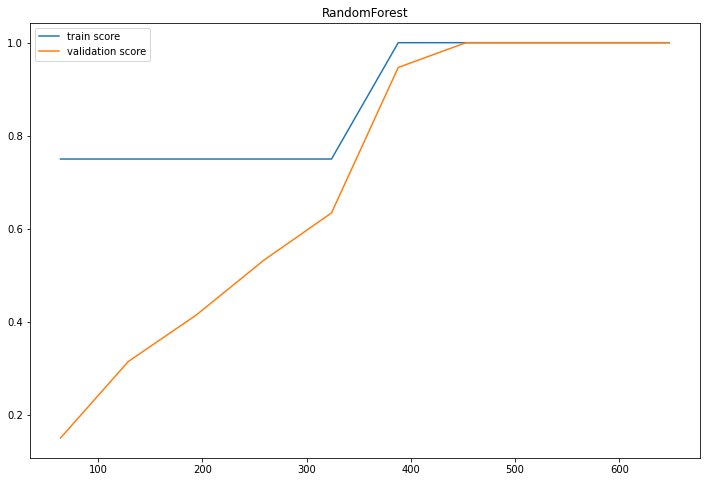

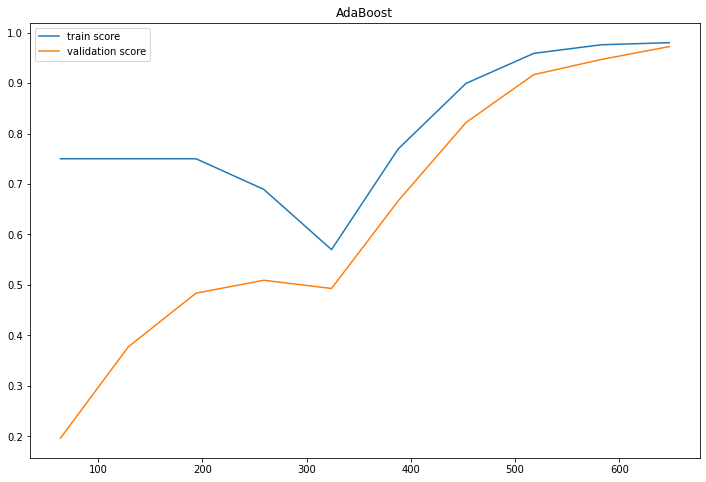

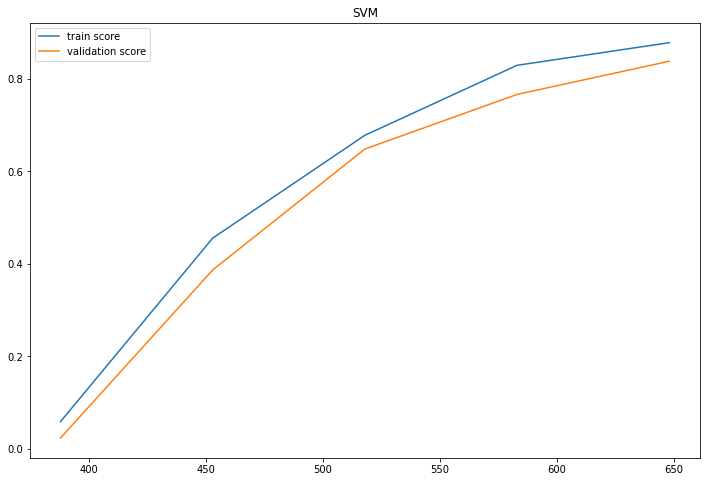

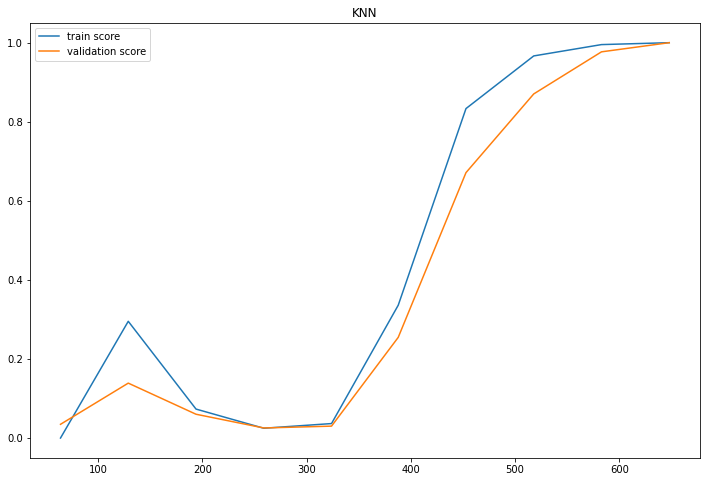

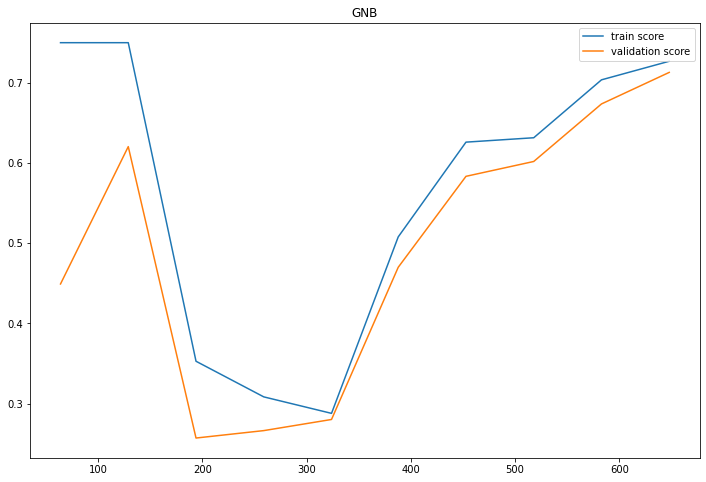

In [ ]:
# ### Evaluation dictionnaire simple
for name, model in dict_of_models.items():
    print(name)
    evaluation(model,name)

# Decision Tree

In [ ]:
# instanciation de l'arbre de décision
# avec les paramètres par défaut
from sklearn.tree import DecisionTreeClassifier
arbre_test = DecisionTreeClassifier(random_state=0)

arbre_test.fit(X_train_scaled,y_train)
ypred=arbre_test.predict(X_test_scaled)
print("On affiche ici la matrice de confusion")
print(confusion_matrix(y_test, ypred))

print("\n Puis on observe le scoring du modèle : \n")
print(classification_report(y_test, ypred))

On affiche ici la matrice de confusion
[[190  23]
 [ 21   1]]

 Puis on observe le scoring du modèle : 

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       213
           1       0.04      0.05      0.04        22

    accuracy                           0.81       235
   macro avg       0.47      0.47      0.47       235
weighted avg       0.82      0.81      0.82       235



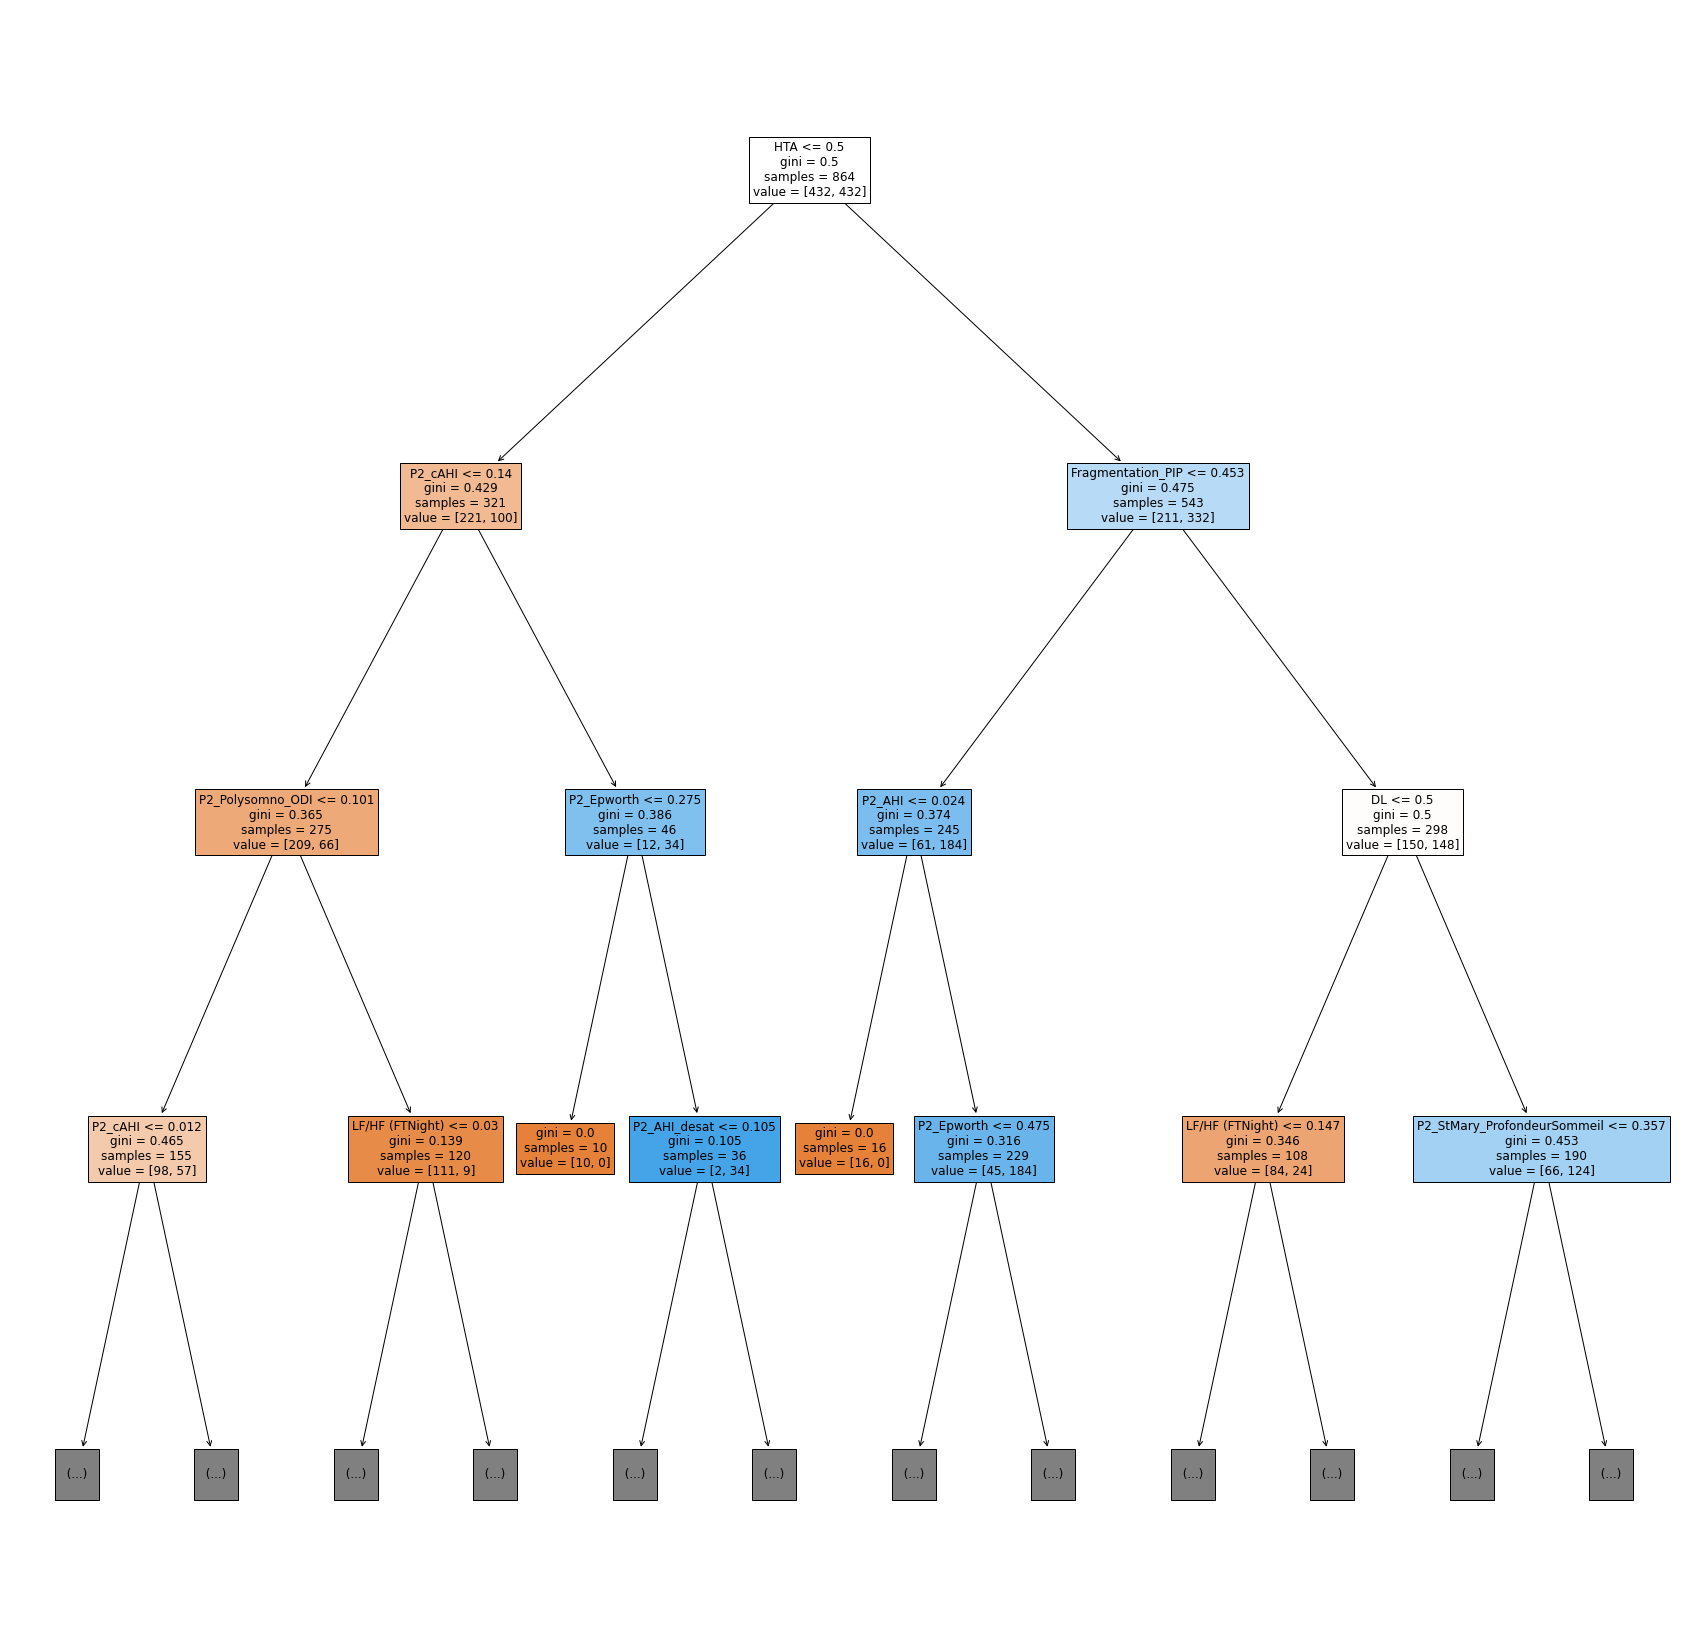

In [ ]:
#affichage dees valeurs des hyperparamètres
#arbre_test.get_params()
# affichage plus grand
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize =(30,30))
plot_tree(arbre_test, feature_names = X_train_scaled.columns,max_depth = 3,filled = True, fontsize=12)
plt.show()

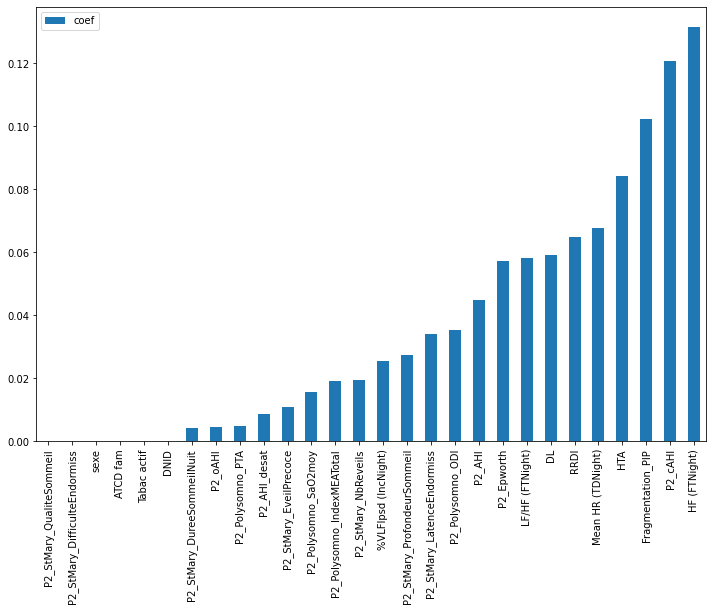

In [ ]:
temp = pd.DataFrame(arbre_test.feature_importances_, index = X_train_scaled.columns, columns=['coef'])
temp.sort_values(by='coef').plot.bar(figsize=(12, 8))

# Random Forest

In [ ]:
# instanciation de l'arbre de décision
# avec les paramètres par défaut
from sklearn.tree import DecisionTreeClassifier
foret_test = RandomForestClassifier(random_state=0)


foret_test.fit(X_train_scaled,y_train)
ypred=foret_test.predict(X_test_scaled)
print("On affiche ici la matrice de confusion :")
print(confusion_matrix(y_test, ypred))

print("\n Puis on observe le scoring du modèle : \n")
print(classification_report(y_test, ypred))


On affiche ici la matrice de confusion :
[[212   1]
 [ 22   0]]

 Puis on observe le scoring du modèle : 

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       213
           1       0.00      0.00      0.00        22

    accuracy                           0.90       235
   macro avg       0.45      0.50      0.47       235
weighted avg       0.82      0.90      0.86       235



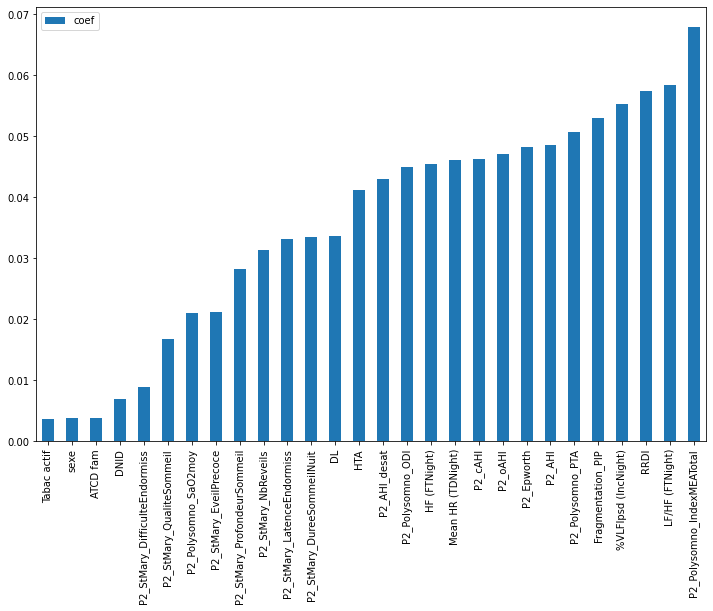

In [ ]:
temp2 = pd.DataFrame(foret_test.feature_importances_, index = X_train_scaled.columns, columns=['coef'])
temp2.sort_values(by='coef').plot.bar(figsize=(12, 8))

# Adaboost

In [ ]:
# instanciation de l'arbre de décision
# avec les paramètres par défaut

from sklearn.tree import DecisionTreeClassifier
ada_test = AdaBoostClassifier(random_state=0)

ada_test.fit(X_train_scaled,y_train)
ypred=ada_test.predict(X_test_scaled)
print("On affiche ici la matrice de confusion")
print(confusion_matrix(y_test, ypred))

print("\n Puis on observe le scoring du modèle : \n")
print(classification_report(y_test, ypred))

On affiche ici la matrice de confusion
[[176  37]
 [ 20   2]]

 Puis on observe le scoring du modèle : 

              precision    recall  f1-score   support

           0       0.90      0.83      0.86       213
           1       0.05      0.09      0.07        22

    accuracy                           0.76       235
   macro avg       0.47      0.46      0.46       235
weighted avg       0.82      0.76      0.79       235



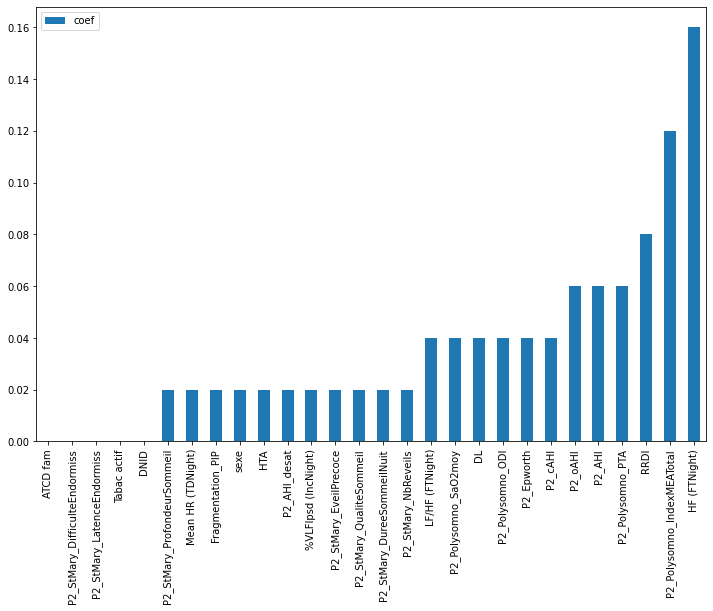

In [ ]:
temp4 = pd.DataFrame(ada_test.feature_importances_, index = X_train_scaled.columns, columns=['coef'])
temp4.sort_values(by='coef').plot.bar(figsize=(12, 8))

#**GaussianNB**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_scaled,y_train)
ypred=gnb.predict(X_test_scaled)
print("On affiche ici la matrice de confusion")
print(confusion_matrix(y_test, ypred))

print("\n Puis on observe le scoring du modèle : \n")
print(classification_report(y_test, ypred))


On affiche ici la matrice de confusion
[[143  70]
 [  9  13]]

 Puis on observe le scoring du modèle : 

              precision    recall  f1-score   support

           0       0.94      0.67      0.78       213
           1       0.16      0.59      0.25        22

    accuracy                           0.66       235
   macro avg       0.55      0.63      0.52       235
weighted avg       0.87      0.66      0.73       235



# **Réseau de neurones**


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
# Initialising the ANN
classifier = Sequential()

In [ ]:
#Dropout
classifier.add(Dropout(0.4))

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 26, kernel_initializer = 'uniform', activation = 'relu', input_dim = 28))

# Adding the second hidden layer
classifier.add(Dense(units = 52, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the third hidden layer
classifier.add(Dense(units = 52, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))





In [ ]:
# Fitting the ANN to the Training set

#classifier.compile(optimizer = 'sgd', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
classifier.fit(X_train_scaled, y_train, batch_size = 10, epochs = 1000)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test_scaled)
y_pred = (y_pred > 0.5)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred) 
cm
#[Vrais Négatifs, Faux positifs
#Faux Négatifs et Vrais positifs]

array([[142,  71],
       [ 10,  12]])

In [ ]:
pred_train= classifier.predict(X_train_scaled)
scores = classifier.evaluate(X_train_scaled, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= classifier.predict(X_test_scaled)
scores2 = classifier.evaluate(X_test_scaled, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))    

Accuracy on training data: 0.9803240895271301% 
 Error on training data: 0.019675910472869873
Accuracy on test data: 0.8085106611251831% 
 Error on test data: 0.1914893388748169


# Régression logistique



In [ ]:
from sklearn.linear_model import LogisticRegression
RegLog = LogisticRegression(random_state=0)

In [ ]:
RegLog.fit(X_train_scaled,y_train)
ypred=RegLog.predict(X_test_scaled)
print("On affiche ici la matrice de confusion")
print(confusion_matrix(y_test, ypred))

print("\n Puis on observe le scoring du modèle : \n")
print(classification_report(y_test, ypred))

On affiche ici la matrice de confusion
[[150  63]
 [  9  13]]

 Puis on observe le scoring du modèle : 

              precision    recall  f1-score   support

           0       0.94      0.70      0.81       213
           1       0.17      0.59      0.27        22

    accuracy                           0.69       235
   macro avg       0.56      0.65      0.54       235
weighted avg       0.87      0.69      0.76       235



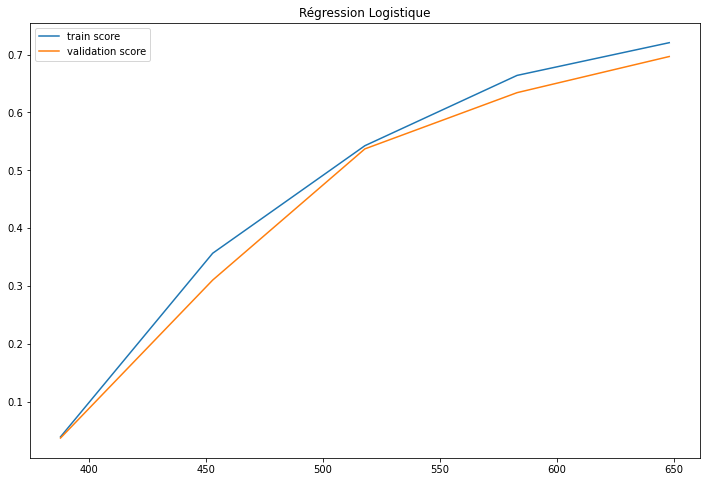

In [ ]:
evaluation(RegLog,"Régression Logistique")

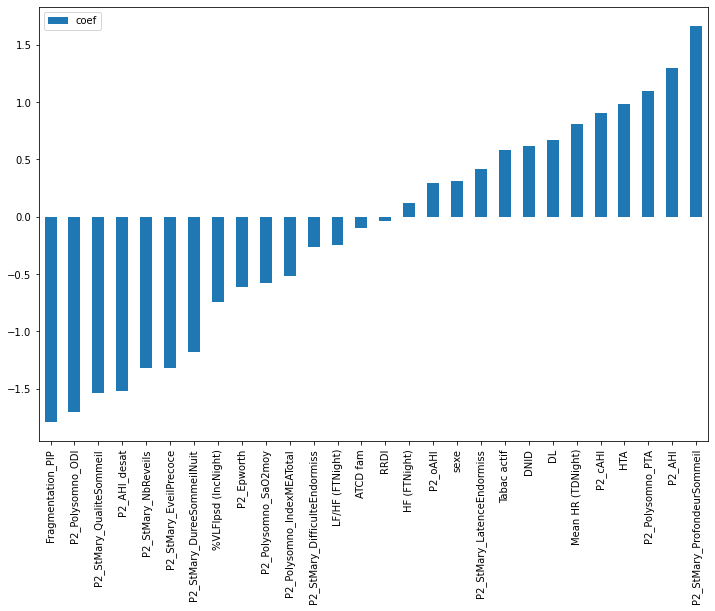

In [ ]:
temp3 = pd.DataFrame(RegLog.coef_[0], index = X_train_scaled.columns, columns=['coef'])
temp3.sort_values(by='coef').plot.bar(figsize=(12, 8))

#Validation Croisée

In [ ]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10)

In [ ]:
#Regression Logistique
from sklearn.model_selection import cross_val_score
scoresRL = cross_val_score(model, X_train_scaled, y_train, cv=10, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresRL.mean(), scoresRL.std()))

0.68 accuracy with a standard deviation of 0.06


In [ ]:
#DecisionTree
from sklearn.model_selection import cross_val_score
scoresDT = cross_val_score(arbre_test, X_train_scaled, y_train, cv=10, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresDT.mean(), scoresDT.std()))

0.95 accuracy with a standard deviation of 0.02


In [ ]:
#AdaBoost
from sklearn.model_selection import cross_val_score
scoresAda = cross_val_score(ada_test, X_train_scaled, y_train, cv=10, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresAda.mean(), scoresAda.std()))

0.91 accuracy with a standard deviation of 0.03


In [ ]:
#RandomForest
from sklearn.model_selection import cross_val_score
scoresRF = cross_val_score(foret_test, X_train_scaled, y_train, cv=10, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresRF.mean(), scoresRF.std()))

1.00 accuracy with a standard deviation of 0.00


In [ ]:
#GaussianNB
from sklearn.model_selection import cross_val_score
scoresGnb = cross_val_score(gnb, X_train_scaled, y_train, cv=10, scoring='f1_macro')
print("%0.2f accuracy with a standard deviation of %0.2f" % (scoresGnb.mean(), scoresGnb.std()))

0.68 accuracy with a standard deviation of 0.06


# GridSearchCV - Reg Log

In [ ]:
# # GridSearchCV - Reg Log

# In[74]:


LogisticRegression = make_pipeline( StandardScaler(), LogisticRegression(random_state=0))

In [ ]:
LogisticRegression.get_params()

In [ ]:
hyper_params = {'logisticregression__C' :np.arange(0.1,1,0.1),
                #'logisticregression__penalty' : ['l1', 'l2']
             }
             

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

grid_rl = GridSearchCV(LogisticRegression, hyper_params, scoring='recall', cv=5)

grid_rl.fit(X_train_scaled, y_train)

print(grid_rl.best_params_)

y_pred = grid_rl.predict(X_test)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

{'logisticregression__C': 0.0013894954943731374, 'logisticregression__penalty': 'l2'}
[[  0 213]
 [  0  22]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       213
           1       0.09      1.00      0.17        22

    accuracy                           0.09       235
   macro avg       0.05      0.50      0.09       235
weighted avg       0.01      0.09      0.02       235



/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
250 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
250 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  

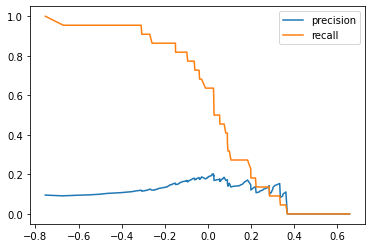

In [ ]:
#Permet de visualiser la futur précision du modèle en fct d'un seuil de précision
from sklearn.metrics import precision_recall_curve
precision, recall, threshold = precision_recall_curve(y_test, grid_rl.best_estimator_.decision_function(X_test_scaled))

plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
sel = RFECV(estimator = RegLog , cv= 4, scoring = 'accuracy')
sel.fit(X_train_scaled,y_train)


RFECV(cv=4, estimator=LogisticRegression(random_state=0), scoring='accuracy')

# GridSearchCV - KNN

In [ ]:
KNN.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('selectkbest', SelectKBest(k='all'))])),
  ('minmaxscaler', MinMaxScaler()),
  ('kneighborsclassifier', KNeighborsClassifier())],
 'verbose': False,
 'pipeline': Pipeline(steps=[('selectkbest', SelectKBest(k='all'))]),
 'minmaxscaler': MinMaxScaler(),
 'kneighborsclassifier': KNeighborsClassifier(),
 'pipeline__memory': None,
 'pipeline__steps': [('selectkbest', SelectKBest(k='all'))],
 'pipeline__verbose': False,
 'pipeline__selectkbest': SelectKBest(k='all'),
 'pipeline__selectkbest__k': 'all',
 'pipeline__selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'kneighborsclassifier__algorithm': 'auto',
 'kneighborsclassifier__leaf_size': 30,
 'kneighborsclassifier__metric': 'minkowski',
 'kneighborsclassifier__metric_params': None,
 'kneighborsclassifier__n_jobs': None,
 'kneighb

In [ ]:
hyper_params = { 'kneighborsclassifier__leaf_size' :np.arange(10,200,20),
              'kneighborsclassifier__n_neighbors' : [5,10,15,20,30,40],
             #'pipeline__selectkbest__k': range(3,30)
             }

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

grid_knn = RandomizedSearchCV(KNN, hyper_params, scoring='recall', cv=5,n_iter=40)

grid_knn.fit(X_train_scaled, y_train)

print(grid_knn.best_params_)

y_pred = grid_knn.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

{'kneighborsclassifier__n_neighbors': 5, 'kneighborsclassifier__leaf_size': 110}
[[166  47]
 [ 16   6]]
              precision    recall  f1-score   support

           0       0.91      0.78      0.84       213
           1       0.11      0.27      0.16        22

    accuracy                           0.73       235
   macro avg       0.51      0.53      0.50       235
weighted avg       0.84      0.73      0.78       235



# GridSearchCV - DecisionTree

In [ ]:
# instanciation de l'arbre de décision
# avec les paramètres par défaut

from sklearn.tree import DecisionTreeClassifier
arbre_1 = DecisionTreeClassifier(random_state=0)

In [ ]:
#affichage dees valeurs des hyperparamètres
arbre_1.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
hyper_params = { 'criterion' :['entropy','gini'],
                 'min_samples_leaf': np.arange(20,60,5),
                 'min_samples_split':np.arange(80,100,5)
                 }



In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

grid_decitree = GridSearchCV(DecisionTreeClassifier(random_state=0), hyper_params, scoring='recall', cv=5)

grid_decitree.fit(X_train_scaled, y_train)

print(grid_decitree.best_params_)

y_pred = grid_decitree.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

{'criterion': 'entropy', 'min_samples_leaf': 20, 'min_samples_split': 80}
[[151  62]
 [ 15   7]]
              precision    recall  f1-score   support

           0       0.91      0.71      0.80       213
           1       0.10      0.32      0.15        22

    accuracy                           0.67       235
   macro avg       0.51      0.51      0.48       235
weighted avg       0.83      0.67      0.74       235



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

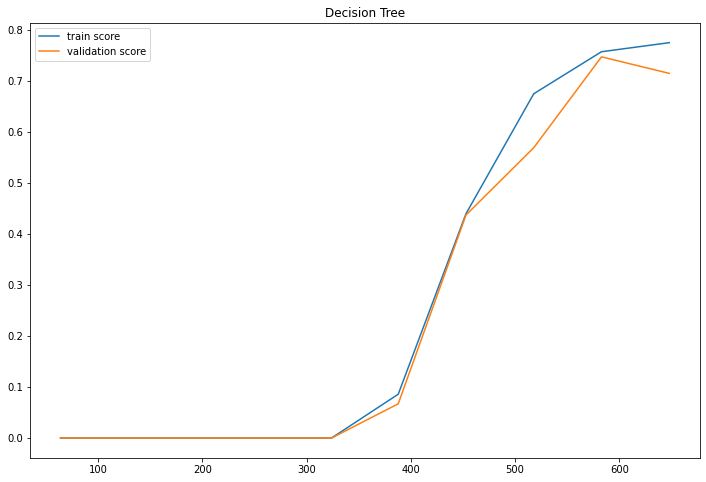

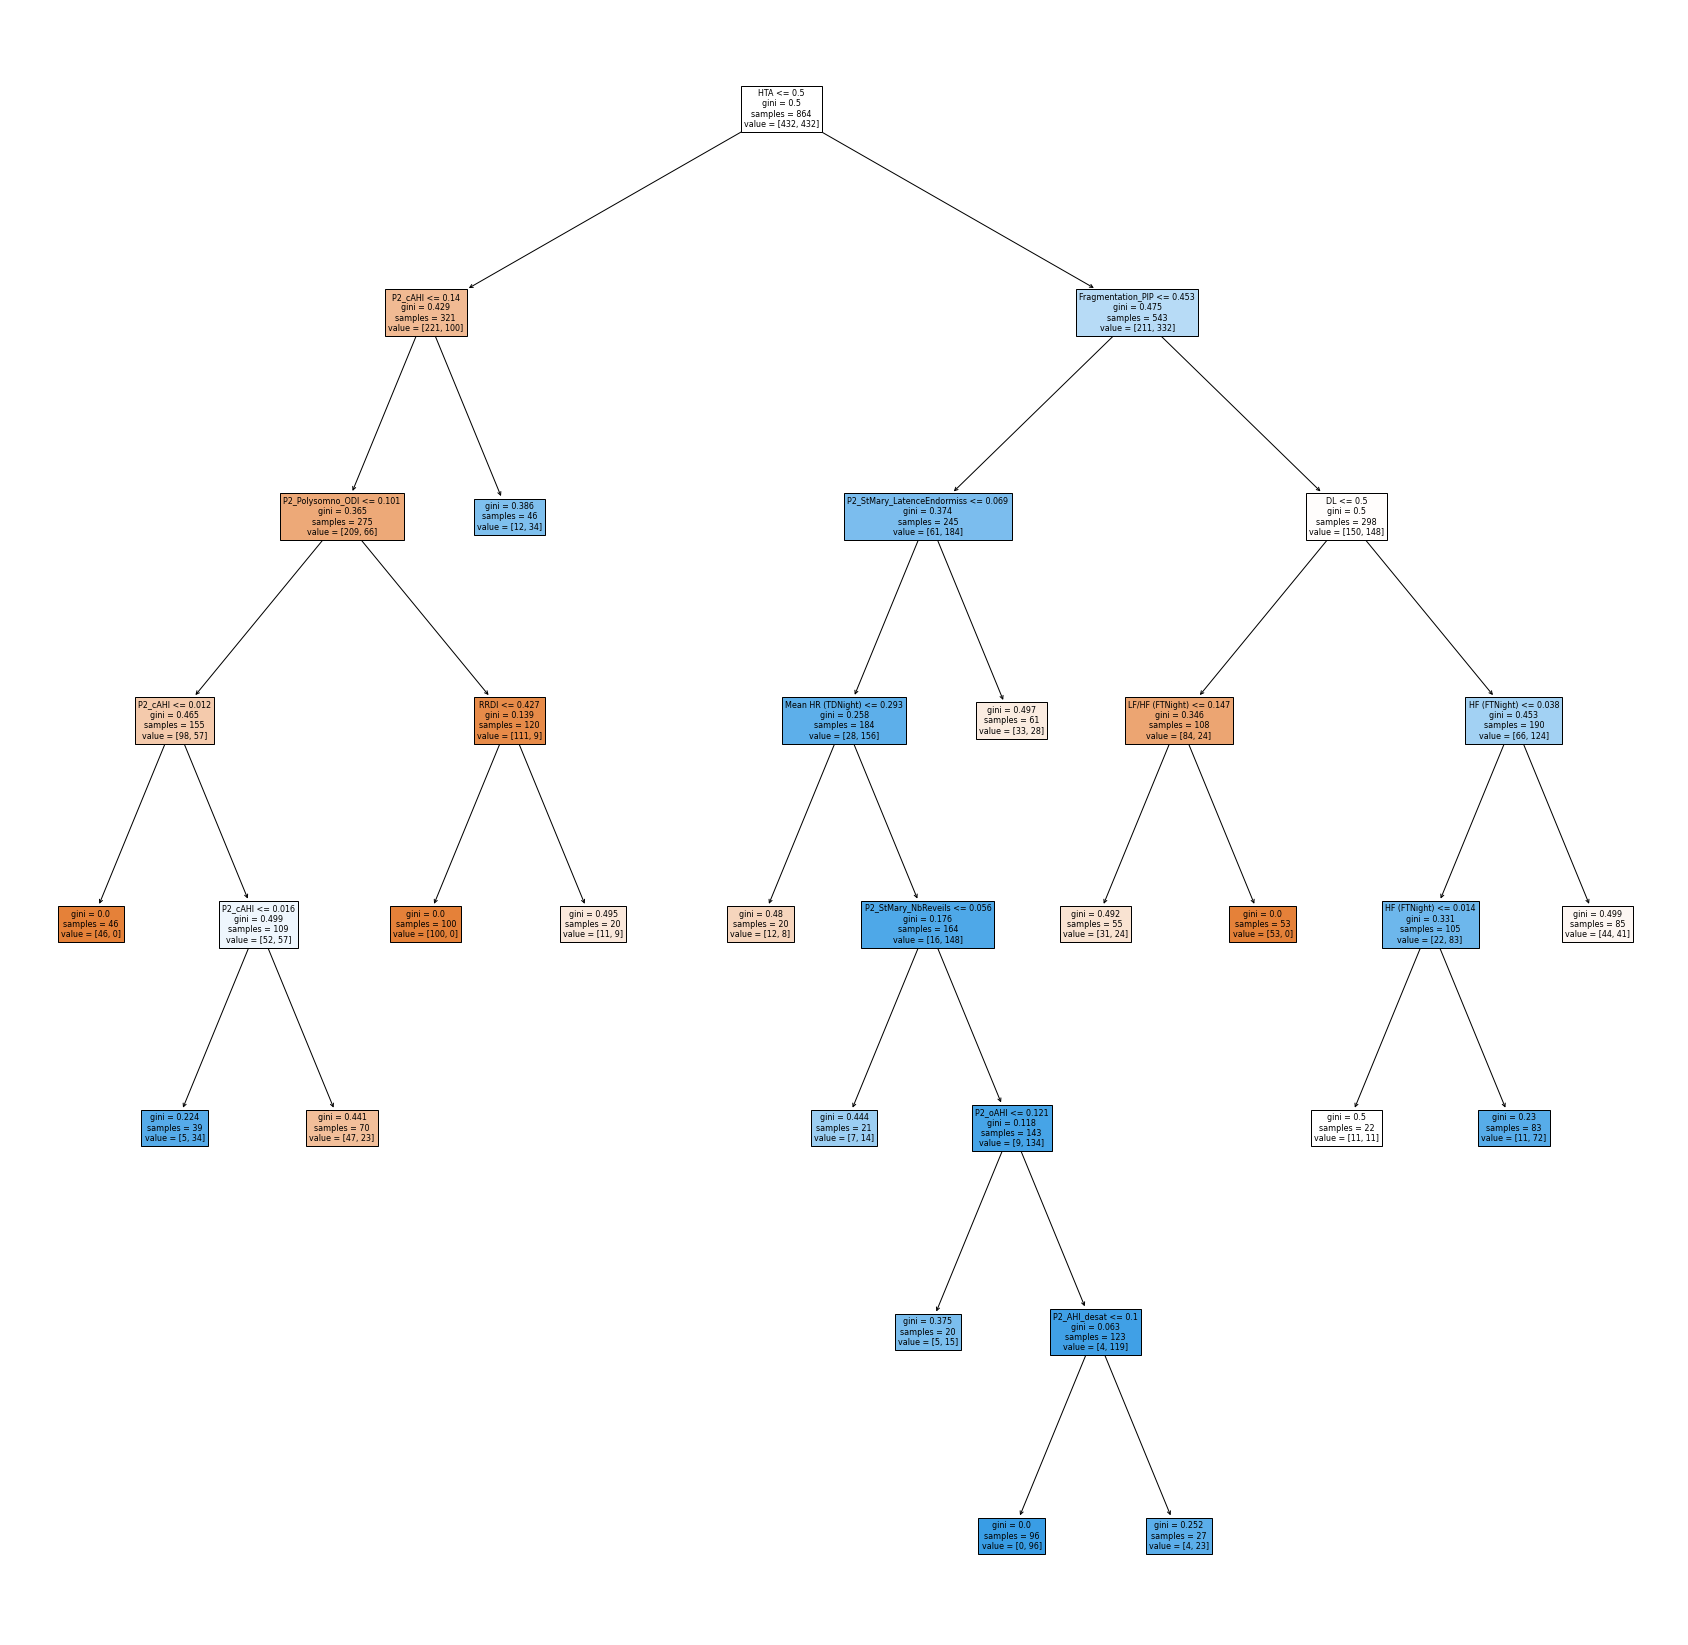

In [ ]:
# affichage plus grand
arbre_final = DecisionTreeClassifier(random_state=0,min_samples_split=95,min_samples_leaf=20, criterion = 'gini')
evaluation(arbre_final,"Decision Tree")
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize =(30,30))
plot_tree(arbre_final, feature_names = X_train_scaled.columns, filled = True)
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to 

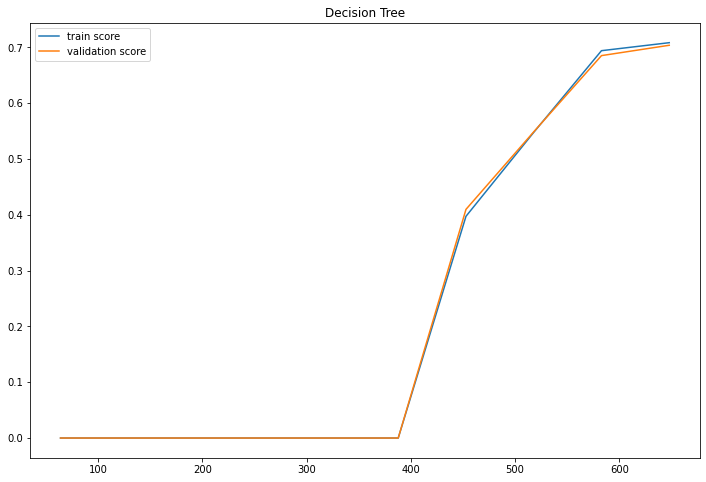

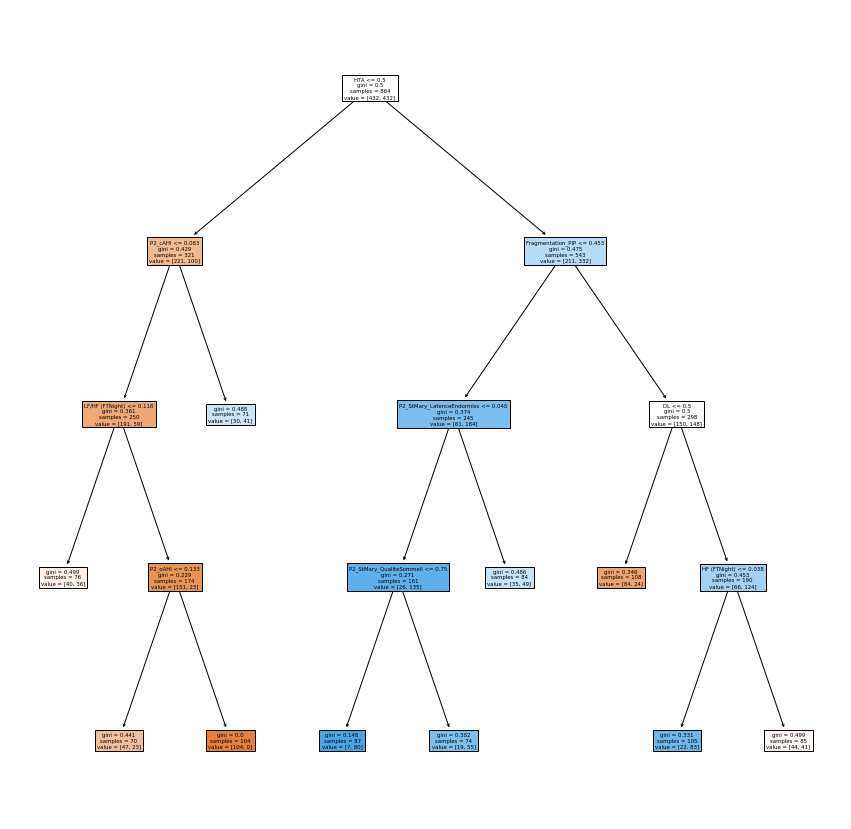

In [ ]:
# affichage plus grand
arbre_memory = DecisionTreeClassifier(random_state=0,min_samples_split=70,min_samples_leaf=70, criterion = 'gini')
evaluation(arbre_memory, "Decision Tree")
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize =(15,15))
plot_tree(arbre_memory, feature_names = X_train_scaled.columns, filled = True)
plt.show()

# GridSearchCV - Random Forest

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score

In [ ]:
param_grid = {'randomforestclassifier__n_estimators' : np.arange(100,1000,200),
             #'randomforestclassifier__max_depth' : [5,10],
             'randomforestclassifier__min_samples_split' : [30,40,50],
             'randomforestclassifier__min_samples_leaf' :[5,10],
             'randomforestclassifier__max_leaf_nodes' : [10,15],
             }

In [ ]:
grid_rf = GridSearchCV(RandomForest, param_grid, scoring='accuracy', cv=5)

grid_rf.fit(X_train_scaled, y_train)

print(grid_rf.best_params_)

y_pred = grid_rf.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

{'randomforestclassifier__max_leaf_nodes': 15, 'randomforestclassifier__min_samples_leaf': 5, 'randomforestclassifier__min_samples_split': 30, 'randomforestclassifier__n_estimators': 700}
[[200  13]
 [ 19   3]]
              precision    recall  f1-score   support

           0       0.91      0.94      0.93       213
           1       0.19      0.14      0.16        22

    accuracy                           0.86       235
   macro avg       0.55      0.54      0.54       235
weighted avg       0.85      0.86      0.85       235



# GridSearchCV - Adaboost

In [ ]:
hyper_params = {'adaboostclassifier__learning_rate' : np.arange(0.1,1,0.1),
                'adaboostclassifier__n_estimators' : np.arange(1,20,10)
               }


In [ ]:
grid_ada = GridSearchCV(AdaBoost, hyper_params, scoring='recall', cv=5)

grid_ada.fit(X_train_scaled, y_train)

print(grid_ada.best_params_)

y_pred = grid_ada.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

{'adaboostclassifier__learning_rate': 0.4, 'adaboostclassifier__n_estimators': 11}
[[160  53]
 [ 15   7]]
              precision    recall  f1-score   support

           0       0.91      0.75      0.82       213
           1       0.12      0.32      0.17        22

    accuracy                           0.71       235
   macro avg       0.52      0.53      0.50       235
weighted avg       0.84      0.71      0.76       235



# Precision recall Adaboost

In [ ]:
#Permet de visualiser la futur précision du modèle en fct d'un seuil de précision
from sklearn.metrics import precision_recall_curve

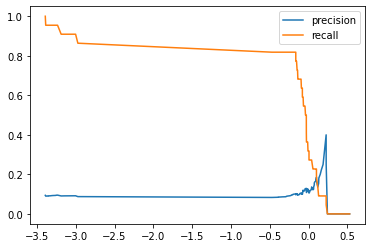

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid_ada.best_estimator_.decision_function(X_test_scaled))



plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()

In [ ]:
  def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred_ada = model_final(grid_ada.best_estimator_, X_test_scaled, threshold=0)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
f1_score(y_test, y_pred_ada)

0.17073170731707318

In [ ]:
recall_score(y_test, y_pred_ada)

0.3181818181818182

#GridSearchCV - SVM

In [ ]:
SVM.get_params()

{'memory': None,
 'steps': [('pipeline',
   Pipeline(steps=[('selectkbest', SelectKBest(k='all'))])),
  ('minmaxscaler', MinMaxScaler()),
  ('svc', SVC(random_state=0))],
 'verbose': False,
 'pipeline': Pipeline(steps=[('selectkbest', SelectKBest(k='all'))]),
 'minmaxscaler': MinMaxScaler(),
 'svc': SVC(random_state=0),
 'pipeline__memory': None,
 'pipeline__steps': [('selectkbest', SelectKBest(k='all'))],
 'pipeline__verbose': False,
 'pipeline__selectkbest': SelectKBest(k='all'),
 'pipeline__selectkbest__k': 'all',
 'pipeline__selectkbest__score_func': <function sklearn.feature_selection._univariate_selection.f_classif(X, y)>,
 'minmaxscaler__clip': False,
 'minmaxscaler__copy': True,
 'minmaxscaler__feature_range': (0, 1),
 'svc__C': 1.0,
 'svc__break_ties': False,
 'svc__cache_size': 200,
 'svc__class_weight': None,
 'svc__coef0': 0.0,
 'svc__decision_function_shape': 'ovr',
 'svc__degree': 3,
 'svc__gamma': 'scale',
 'svc__kernel': 'rbf',
 'svc__max_iter': -1,
 'svc__probability':

In [ ]:

hyper_params = {'svc__gamma' : [1e-3, 1e-4],
                'svc__C' : [1, 10, 100 ,1000],
                #'pipeline__selectkbest__k' : range(1,8)
               }

In [ ]:
grid_svm = GridSearchCV(SVM, hyper_params, scoring='recall', cv=5)

grid_svm.fit(X_train_scaled, y_train)

print(grid_svm.best_params_)

y_pred = grid_svm.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

{'svc__C': 10, 'svc__gamma': 0.001}
[[126  87]
 [  5  17]]
              precision    recall  f1-score   support

           0       0.96      0.59      0.73       213
           1       0.16      0.77      0.27        22

    accuracy                           0.61       235
   macro avg       0.56      0.68      0.50       235
weighted avg       0.89      0.61      0.69       235



# Precision recall SVM

In [ ]:
#Permet de visualiser la futur précision du modèle en fct d'un seuil de précision
from sklearn.metrics import precision_recall_curve

In [ ]:
precision, recall, threshold = precision_recall_curve(y_test, grid_svm.best_estimator_.decision_function(X_test_scaled))

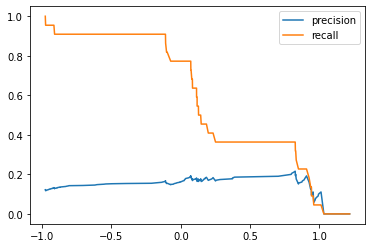

In [ ]:
plt.plot(threshold, precision[:-1], label='precision')
plt.plot(threshold, recall[:-1], label='recall')
plt.legend()


In [ ]:
def model_final(model, X, threshold=0):
    return model.decision_function(X) > threshold

In [ ]:
y_pred_svm = model_final(grid_svm.best_estimator_, X_test_scaled, threshold=0.1)

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
f1_score(y_test, y_pred_svm)

0.27722772277227725

# Gaussian

In [ ]:
GaussianNB.get_params()

In [ ]:

hyper_params = {'C':[0.05,0.1,0.2,0.3,0.25,0.4,0.5,0.6,0.7,0.8,0.9,1],
         'gamma':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0],
         'kernel':['rbf','linear']
        }

In [ ]:
grid_gnb = GridSearchCV(GaussianNB, hyper_params, scoring='recall', cv=5)

grid_gnb.fit(X_train_scaled, y_train)

print(grid_gnb.best_params_)

y_pred = grid_gnb.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

# Courbe ROC AUC

In [ ]:
y_pred_cart = arbre_final.predict_proba(X_test_scaled)[:,-1]

In [ ]:
y_pred_rdf = (grid_rf.best_estimator_).predict_proba(X_test)[:,-1]

In [ ]:
y_pred_ada = (grid_ada.best_estimator_).predict_proba(X_test_scaled)[:,-1]

In [ ]:
y_pred_knn = (grid_knn.best_estimator_).predict_proba(X_test_scaled)[:,-1]

In [ ]:
y_pred_rl = (grid_rl.best_estimator_).predict_proba(X_test_scaled)[:,-1]

In [ ]:
y_pred_deciTree = (grid_decitree.best_estimator_).predict_proba(X_test_scaled)[:,1]

In [ ]:
y_pred_mlp = classifier.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import roc_curve, auc

#courbe roc du modèle Cart
cart_fpr, cart_tpr, cart_treshold = roc_curve(y_test,y_pred_cart)
auc_cart = auc(cart_fpr, cart_tpr)

#courbe roc du modèle random forest
rdf_fpr, rdf_tpr, rdf_treshold = roc_curve(y_test,y_pred_rdf)
auc_rdf = auc(rdf_fpr, rdf_tpr)

#courbe roc du modèle adaboost
ada_fpr, ada_tpr, ada_treshold = roc_curve(y_test,y_pred_ada)
auc_ada = auc(ada_fpr, ada_tpr)

#courbe roc du modèle SVM
#svm_fpr, svm_tpr, svm_treshold = roc_curve(y_test,y_pred_svm)
#auc_svm = auc(svm_fpr, svm_tpr)

#courbe roc du modèle KNN
knn_fpr, knn_tpr, knn_treshold = roc_curve(y_test,y_pred_knn)
auc_knn = auc(knn_fpr, knn_tpr)

#courbe roc du modèle de Regression Logistic
rl_fpr, rl_tpr, rl_treshold = roc_curve(y_test,y_pred_rl)
auc_rl = auc(rl_fpr, rl_tpr)

#courbe roc du modèle de Regression Logistic SEL
y_pred_rl2 = sel.estimator_.predict(X_test_scaled[X_test_scaled.columns[sel.support_]])
rl2_fpr, rl2_tpr, rl2_treshold = roc_curve(y_test,y_pred_rl2)
auc_rl2 = auc(rl2_fpr, rl2_tpr)

#courbe du modèle Decision Tree
dt_fpr, dt_tpr, dt_treshold = roc_curve(y_test,y_pred_deciTree)
auc_dt = auc(dt_fpr, dt_tpr)

#courbe du modèle MLP
#mlp_fpr, mlp_tpr, mlp_treshold = roc_curve(y_test,y_pred_mlp)
#auc_mlp = auc(mlp_fpr, mlp_tpr)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


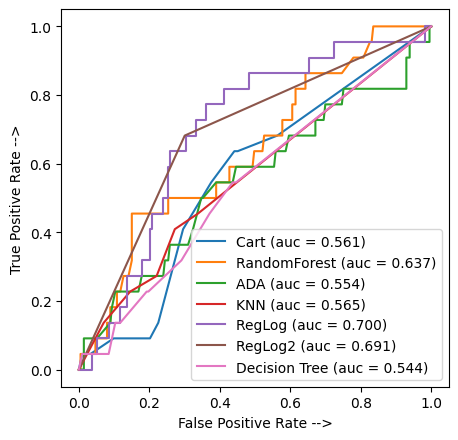

In [ ]:
plt.figure(figsize=(5,5), dpi = 100)
plt.plot(cart_fpr, cart_tpr, linestyle = '-', label ='Cart (auc = %0.3f)'% auc_cart)
plt.plot(rdf_fpr, rdf_tpr, linestyle = '-', label ='RandomForest (auc = %0.3f)'% auc_rdf)
plt.plot(ada_fpr, ada_tpr, linestyle = '-', label ='ADA (auc = %0.3f)'% auc_ada)
#plt.plot(svm_fpr, svm_tpr, linestyle = '-', label ='SVM (auc = %0.3f)'% auc_svm)
plt.plot(knn_fpr, knn_tpr, linestyle = '-', label ='KNN (auc = %0.3f)'% auc_knn)
plt.plot(rl_fpr, rl_tpr, linestyle = '-', label ='RegLog (auc = %0.3f)'% auc_rl)
plt.plot(rl2_fpr, rl2_tpr, linestyle = '-', label ='RegLog2 (auc = %0.3f)'% auc_rl2)
plt.plot(dt_fpr, dt_tpr, linestyle = '-', label ='Decision Tree (auc = %0.3f)'% auc_dt)
#plt.plot(mlp_fpr, mlp_tpr, linestyle = '-', label ='MLP (auc = %0.3f)'% auc_mlp)

plt.xlabel ('False Positive Rate -->')
plt.ylabel ('True Positive Rate -->')

plt.legend()
plt.show()